In [15]:
%run "cnn_classification.ipynb"

Number of images: 11788
Number of training images by default: 5994
Number of testing images by default: 5794
Number of classes: 200

Final number of images: 11788
Final number of training images: 5994
Final number of testing images: 5794



In [2]:
model = models.efficientnet_b1(weights="DEFAULT")

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
# freeze all layers for fine tuning (not doing this takes it very long to train)
for param in model.parameters():
    param.requires_grad = False

# number of inputs in last layer
num_ftrs = model.classifier[1].in_features

model.classifier[0] = nn.Dropout(p=0.4, inplace=True)
model.classifier[1] = nn.Linear(num_ftrs, num_out_ftrs)

# printing the last layer : classifier
print(model.classifier)

model = model.to(device)

Sequential(
  (0): Dropout(p=0.4, inplace=True)
  (1): Linear(in_features=1280, out_features=200, bias=True)
)


In [5]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 256200


(6769384, 256200)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 4.80 Acc: 8.31% Time_Taken: 1m 12s
test Loss: 4.07 Acc: 20.28% Time_Taken: 0m 55s

Epoch 2/10- - - - - - - - - - 
train Loss: 3.80 Acc: 27.13% Time_Taken: 1m 9s
test Loss: 3.41 Acc: 31.77% Time_Taken: 0m 54s

Epoch 3/10- - - - - - - - - - 
train Loss: 3.24 Acc: 35.72% Time_Taken: 1m 8s
test Loss: 2.90 Acc: 37.63% Time_Taken: 0m 56s

Epoch 4/10- - - - - - - - - - 
train Loss: 2.93 Acc: 40.02% Time_Taken: 1m 8s
test Loss: 2.60 Acc: 42.66% Time_Taken: 0m 53s

Epoch 5/10- - - - - - - - - - 
train Loss: 2.67 Acc: 44.36% Time_Taken: 1m 8s
test Loss: 2.37 Acc: 45.70% Time_Taken: 0m 54s

Epoch 6/10- - - - - - - - - - 
train Loss: 2.49 Acc: 46.48% Time_Taken: 1m 7s
test Loss: 2.30 Acc: 46.34% Time_Taken: 0m 53s

Epoch 7/10- - - - - - - - - - 
train Loss: 2.32 Acc: 49.73% Time_Taken: 1m 8s
test Loss: 2.21 Acc: 47.84% Time_Taken: 0m 54s

Epoch 8/10- - - - - - - - - - 
train Loss: 2.23 Acc: 50.50% Time_Taken: 1m 10s
test Loss: 2.1

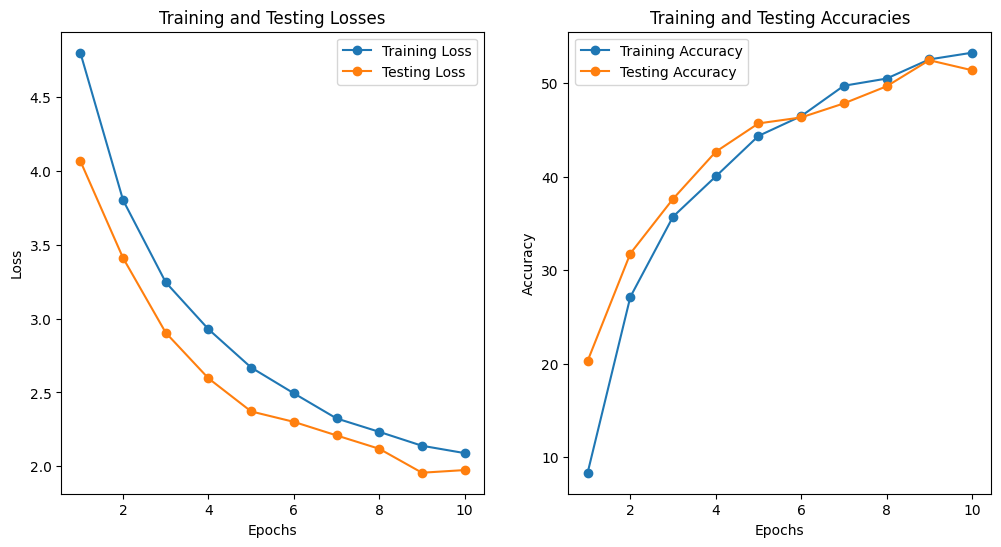

In [6]:
model1, checkpoint1 = train_model(model, num_epoch=10, time_start_from=0)

In [7]:
for param in model.parameters():
    param.requires_grad = True

In [8]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 6769384


(6769384, 6769384)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 2.70 Acc: 36.15% Time_Taken: 2m 11s
test Loss: 1.93 Acc: 49.10% Time_Taken: 0m 52s

Epoch 2/10- - - - - - - - - - 
train Loss: 2.21 Acc: 45.76% Time_Taken: 2m 7s
test Loss: 1.64 Acc: 58.61% Time_Taken: 0m 46s

Epoch 3/10- - - - - - - - - - 
train Loss: 1.87 Acc: 53.22% Time_Taken: 2m 3s
test Loss: 1.62 Acc: 59.82% Time_Taken: 0m 46s

Epoch 4/10- - - - - - - - - - 
train Loss: 1.67 Acc: 57.14% Time_Taken: 2m 3s
test Loss: 1.59 Acc: 61.93% Time_Taken: 0m 46s

Epoch 5/10- - - - - - - - - - 
train Loss: 1.56 Acc: 60.91% Time_Taken: 2m 7s
test Loss: 1.49 Acc: 65.41% Time_Taken: 0m 48s

Epoch 6/10- - - - - - - - - - 
train Loss: 1.43 Acc: 64.08% Time_Taken: 2m 7s
test Loss: 1.47 Acc: 64.96% Time_Taken: 0m 48s

Epoch 7/10- - - - - - - - - - 
train Loss: 1.36 Acc: 65.72% Time_Taken: 2m 9s
test Loss: 1.69 Acc: 63.81% Time_Taken: 0m 46s

Epoch 8/10- - - - - - - - - - 
train Loss: 1.21 Acc: 69.30% Time_Taken: 2m 5s
test Loss: 1.6

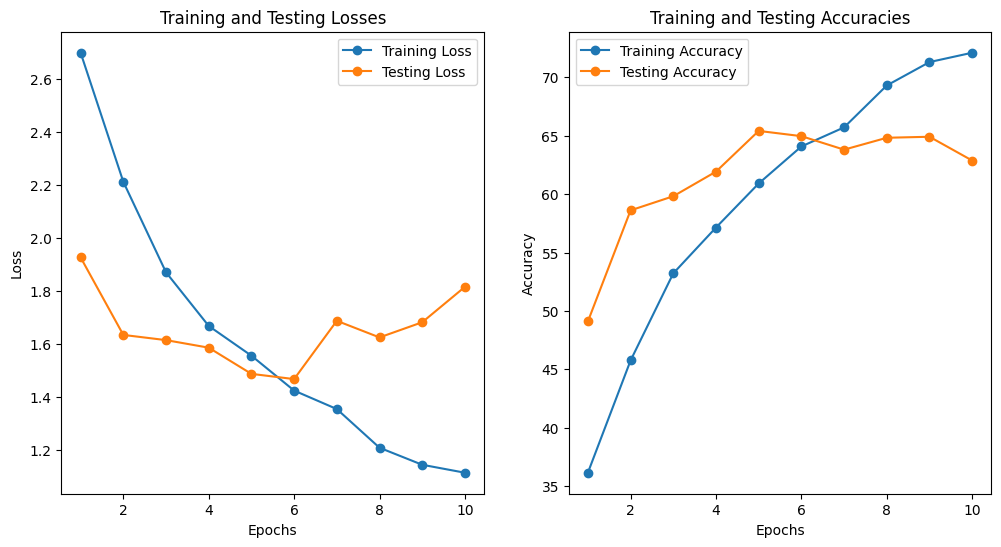

In [9]:
model2, checkpoint2 = train_model(model, num_epoch=10, time_start_from=checkpoint1["time_taken"])

In [10]:
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

In [11]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 256200


(6769384, 256200)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 1.19 Acc: 71.24% Time_Taken: 1m 1s
test Loss: 1.20 Acc: 69.71% Time_Taken: 0m 46s

Epoch 2/10- - - - - - - - - - 
train Loss: 1.09 Acc: 73.27% Time_Taken: 1m 0s
test Loss: 1.24 Acc: 69.52% Time_Taken: 0m 46s

Epoch 3/10- - - - - - - - - - 
train Loss: 1.06 Acc: 74.39% Time_Taken: 1m 0s
test Loss: 1.22 Acc: 70.52% Time_Taken: 0m 46s

Epoch 4/10- - - - - - - - - - 
train Loss: 0.96 Acc: 76.24% Time_Taken: 0m 60s
test Loss: 1.23 Acc: 70.23% Time_Taken: 0m 46s

Epoch 5/10- - - - - - - - - - 
train Loss: 0.92 Acc: 77.13% Time_Taken: 1m 0s
test Loss: 1.25 Acc: 70.30% Time_Taken: 0m 46s

Epoch 6/10- - - - - - - - - - 
train Loss: 0.90 Acc: 77.86% Time_Taken: 1m 1s
test Loss: 1.22 Acc: 71.49% Time_Taken: 0m 50s

Epoch 7/10- - - - - - - - - - 
train Loss: 0.88 Acc: 78.56% Time_Taken: 1m 7s
test Loss: 1.32 Acc: 69.87% Time_Taken: 0m 53s

Epoch 8/10- - - - - - - - - - 
train Loss: 0.85 Acc: 79.03% Time_Taken: 1m 10s
test Loss: 1.

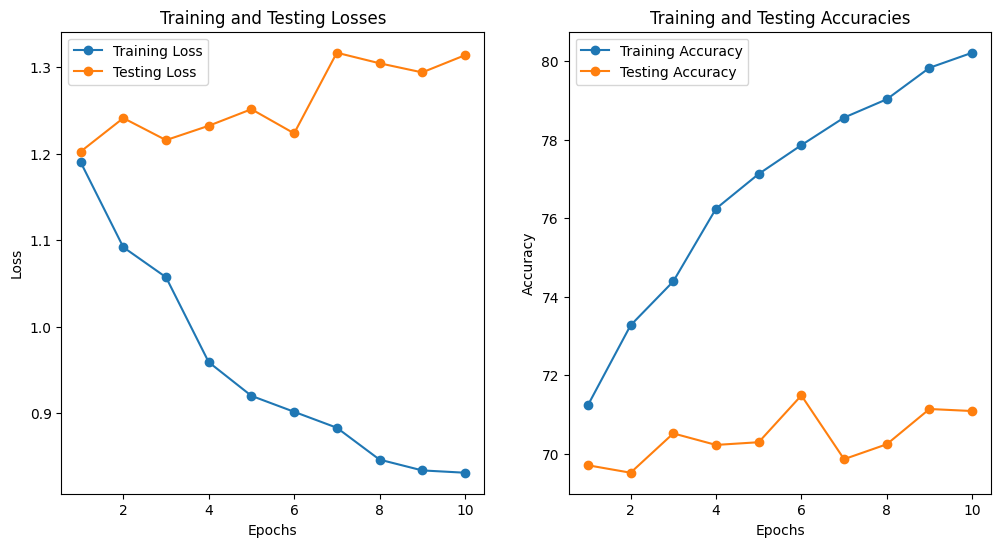

In [12]:
model3, checkpoint3 = train_model(model, num_epoch=10, time_start_from=checkpoint2["time_taken"], save_checkpoint=True)

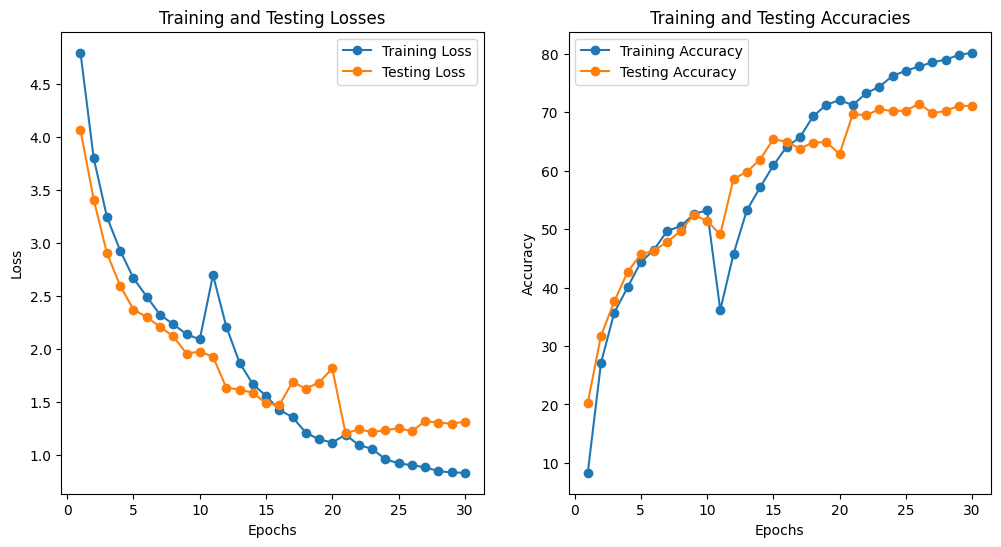

In [16]:
plot_multi_checkpoint_graph([checkpoint1,checkpoint2,checkpoint3])